In [1]:
# Install all required libraries
!pip install pandas numpy matplotlib seaborn plotly scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# Example dataset path
path = r"C:\Users\Admin\Clean_Air_Quality_Dataset2.csv"

# Load the dataset
df = pd.read_csv(path)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()


Dataset Shape: (43810, 9)

First 5 rows:
              datetime  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0  2010-01-01 00:00:00    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1  2010-01-01 01:00:00    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2  2010-01-01 02:00:00    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3  2010-01-01 03:00:00    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4  2010-01-01 04:00:00    NaN   -20 -12.0  1018.0   NW  12.97   0   0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43810 entries, 0 to 43809
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  43810 non-null  object 
 1   pm2.5     43786 non-null  float64
 2   DEWP      43810 non-null  int64  
 3   TEMP      43810 non-null  float64
 4   PRES      43810 non-null  float64
 5   cbwd      43810 non-null  object 
 6   Iws       43810 non-null  float64
 7   Is        43810 non-null  int64  
 8   Ir        43810 non-n

In [3]:
#Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:\n", df.describe())

# Data types
print("\nData Types:\n", df.dtypes)

# Unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



Missing Values:
 datetime     0
pm2.5       24
DEWP         0
TEMP         0
PRES         0
cbwd         0
Iws          0
Is           0
Ir           0
dtype: int64

Statistical Summary:
               pm2.5          DEWP          TEMP          PRES           Iws  \
count  43786.000000  43810.000000  43810.000000  43810.000000  43810.000000   
mean      97.788494      1.815111     12.447523   1016.448665     23.896203   
std       91.408828     14.433141     12.199248     10.269068     50.017056   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      136.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

                 Is            Ir  
count  43810.000000  43810.000000  
mean       0.052751      0.

In [4]:
# Step 4: Convert Categorical Data to Numerical
# Method 1: Label Encoding (for ordinal or small categorical features)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

#  Method 2: One-Hot Encoding (for large categorical features)
# df = pd.get_dummies(df, drop_first=True) ---->Creates a new column for each category with 0/1 values.

print("\nAfter Encoding:\n")
print(df.head())



After Encoding:

   datetime  pm2.5  DEWP  TEMP    PRES  cbwd    Iws  Is  Ir
0         0    NaN   -21 -11.0  1021.0     1   1.79   0   0
1         1    NaN   -21 -12.0  1020.0     1   4.92   0   0
2         2    NaN   -21 -11.0  1019.0     1   6.71   0   0
3         3    NaN   -21 -14.0  1019.0     1   9.84   0   0
4         4    NaN   -20 -12.0  1018.0     1  12.97   0   0


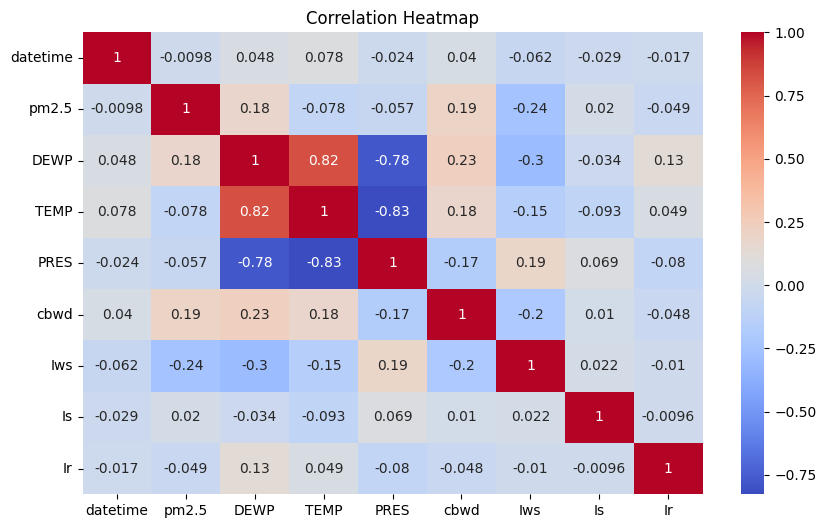

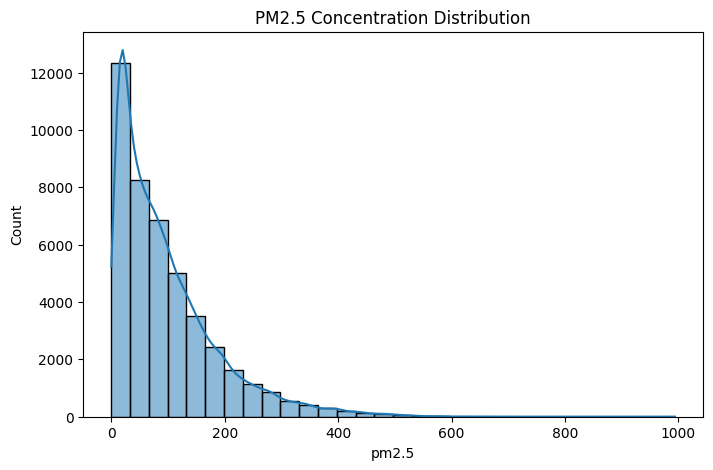

In [5]:
#Step 5: Data Visualization
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Example: Distribution of a key pollutant
if "pm2.5" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["pm2.5"], kde=True, bins=30)
    plt.title("PM2.5 Concentration Distribution")
    plt.show()

# Example: Time-series visualization (if time column exists)
if "date" in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    plt.figure(figsize=(12,6))
    plt.plot(df['date'], df['pm2.5'])
    plt.title("PM2.5 Levels Over Time")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.show()


In [6]:
#Step 6: Split Dataset into Train & Test Sets
# Assume target variable is 'pm2.5' 
X = df.drop('pm2.5', axis=1)
y = df['pm2.5']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (35048, 8)
Testing set shape: (8762, 8)
